In [ ]:
'''
This is an attempt at visualizing the parameter tuning in a 3D mesh model
'''

In [34]:
import plotly.graph_objects as go
import numpy as np
import pandas as pd
import plotly.io as pio
import kaleido
import matplotlib.pyplot as plt

In [16]:
params = pd.read_csv('best_params.csv')

In [17]:
params = params.iloc[0:34,:]
params.head(35)

,Unnamed: 0,K,n_trees,f1_score
0,2,5,50,0.946892
1,3,10,50,0.946869
2,4,20,50,0.946884
3,5,50,50,0.946943
4,6,100,50,0.946908
5,7,150,50,0.946922
6,8,3,100,0.894652
7,9,5,100,0.894709
8,10,10,100,0.894803
9,11,20,100,0.894898


In [18]:
# Extract parameters and scores
param1 = params['K'].unique()
param2 = params['n_trees'].unique()

# Create a pivot table for f1_scores
f1_scores_pivot = params.pivot(index='K', columns='n_trees', values='f1_score')

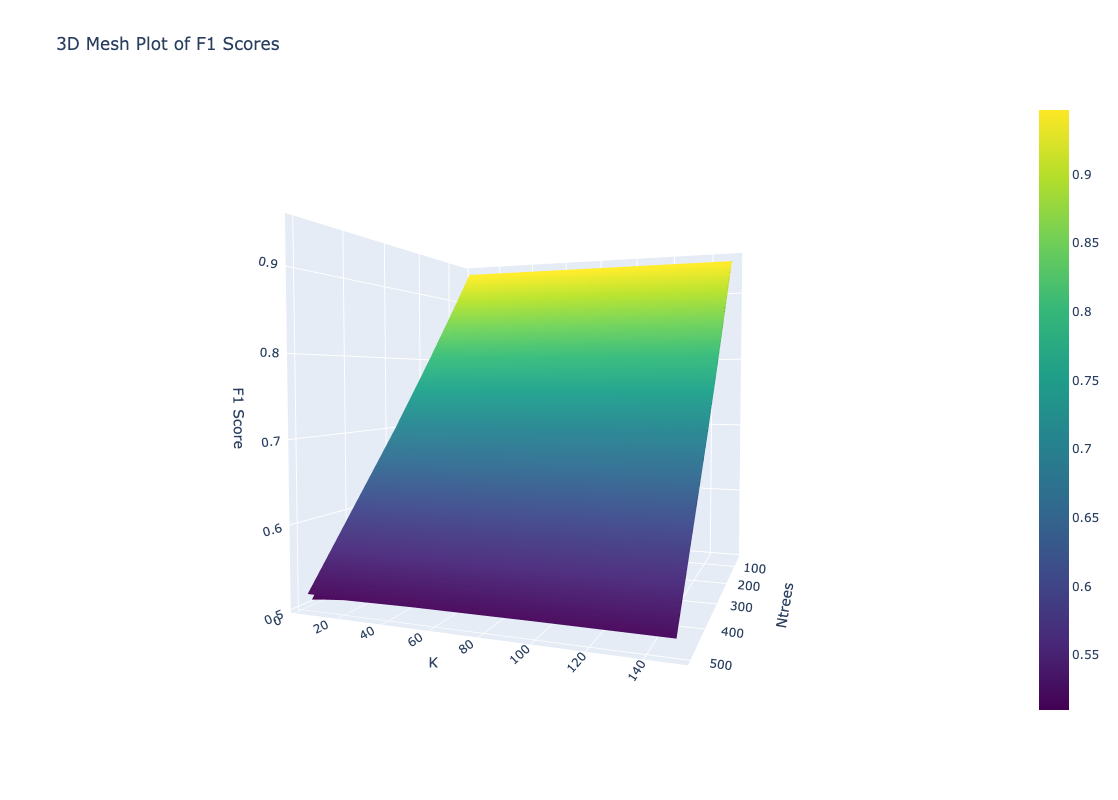

In [36]:
# Convert pivot table to arrays
param1_grid, param2_grid = np.meshgrid(param2, param1)
f1_scores_grid = f1_scores_pivot.values

# Create the 3D mesh plot
fig = go.Figure(data=[go.Surface(z=f1_scores_grid, x=param1_grid, y=param2_grid, colorscale='Viridis')])

# Update layout
fig.update_layout(
    title='3D Mesh Plot of F1 Scores',
    scene=dict(
        xaxis_title='Ntrees',
        yaxis_title='K',
        zaxis_title='F1 Score'
    ),
    width=1200,  # Width of the figure
    height=800   # Height of the figure

)

# Show plot
fig.show()

In [35]:
# Save the plot as a PDF
plt.savefig('plot.pdf', format='pdf')

<Figure size 640x480 with 0 Axes>